## Gestion Segura de Datos de Clientes

In [10]:
import pandas as pd
import numpy as np
import uuid 
import hashlib
from sklearn.utils import resample

1.- Cargar los datos de clientes provistos en un archivo CSV

In [2]:
clientes = pd.read_csv('clientes.csv')

In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nombre     200 non-null    object
 1   direccion  200 non-null    object
 2   edad       200 non-null    int64 
 3   categoria  200 non-null    int64 
 4   salario    200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
clientes.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


2.- Aplicar tecnicas de anonimizacion al campo direccion, edad y salario para proteger la identidad de los clientes

In [6]:
# Anonimizacion direccion 
clientes.drop(['direccion'], axis=1, inplace=True)
# Anonimizacion edad
clientes['edad'] = (clientes['edad'] // 10) * 10
# Anonimizacion salario
ruido = np.random.normal(0,100,size=clientes['salario'].shape)
clientes['salario'] += ruido

In [7]:
clientes.head()

,nombre,edad,categoria,salario
0,Richard Martin,60,0,60985.088298
1,James Jones,60,1,53731.123795
2,Patricia Wilson,10,0,60360.595501
3,Elizabeth Robinson,20,1,42285.452063
4,Charles Brown,20,1,37536.830481


3.- Aplicar tecnicas de pseudonimizacion al campo nombre

In [11]:
#Pseudo-anonimizacion
id_pseudo = []
for n in range(len(clientes)):
    id_pseudo.append((str(uuid.uuid4())))

clientes['id_pseudo'] = id_pseudo
clientes.drop(['nombre'], axis=1, inplace=True)


In [12]:
clientes.head()

,edad,categoria,salario,id_pseudo
0,60,0,60985.088298,82548a1c-060e-4b71-a2b8-6eb6fbb17872
1,60,1,53731.123795,9fac56f4-29ec-45a5-8aa5-72fe9f22a04e
2,10,0,60360.595501,f9b1c849-c1bc-43f9-8633-204ad1629da8
3,20,1,42285.452063,e0190442-2e87-4b7d-a5ce-a4cf6b76e570
4,20,1,37536.830481,0639a648-bf5b-4583-9bdb-24cf8c3cc657


4.- Implementar una funcion de balanceo de datos para asegurar la representacion equitativa de diversas categorias en el analisis posterior

In [13]:
# Balanceo
agrupado = clientes.groupby('categoria')

# DataFrame vacio para almacenar los datos balanceados
clientes_balanceados = pd.DataFrame()

for categoria, grupo in agrupado:
    # Encontrar el tamano maximo del grupo
    max_size = agrupado.size().max()
    # Re-muestrar el grupo para que tengan el mismo tamano
    grupo_balanceado = resample(grupo, replace=True, n_samples=max_size, random_state=42)
    clientes_balanceados = pd.concat([clientes_balanceados, grupo_balanceado])

clientes_balanceados.head()

,edad,categoria,salario,id_pseudo
122,30,0,77532.373099,4e9b596e-2238-429a-9426-39e993168f84
35,10,0,30579.350177,fc5c5986-b8b3-48ab-95d0-65fb795eada9
173,60,0,35528.305577,ae374023-e470-44b1-9b88-4678e98cb0af
141,30,0,62955.455966,a0b87d6b-b436-4f68-994d-9bb6c9b984cf
46,50,0,49574.955400,b465f218-6891-4676-b36b-cb7e4fb1dff5


5.- Realizar un analisis simple de los datos para identificar tendencias o patrones que podrian ser utiles para decisiones de negocio o marketing

In [17]:
# Libreria necesaria para graficar 
import matplotlib.pyplot as plt
import seaborn as sns

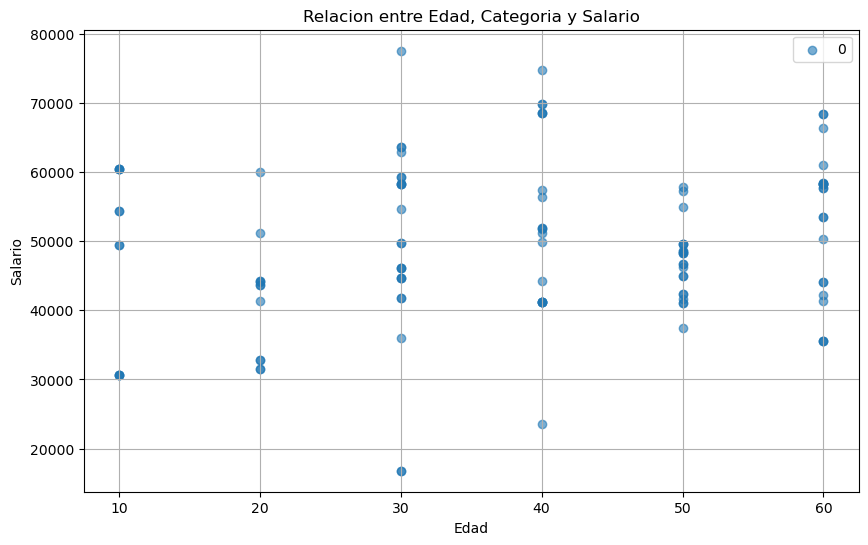

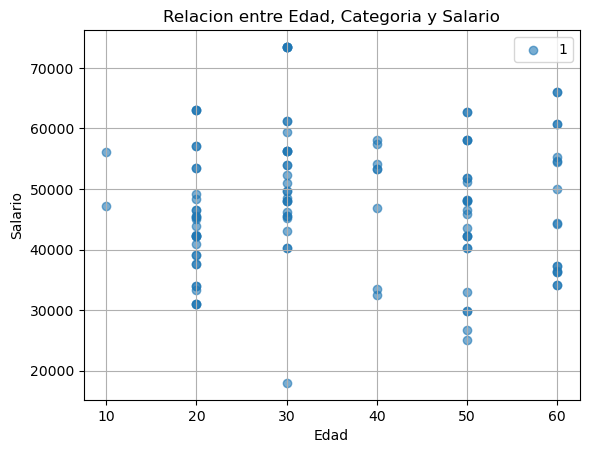

In [16]:
# Grafico de relacion entre la edad, categoria y salario
plt.figure(figsize=(10,6))
for categoria, grupo in clientes_balanceados.groupby('categoria'):
    plt.scatter(grupo['edad'], grupo['salario'], label=categoria, alpha=0.6)
    plt.title('Relacion entre Edad, Categoria y Salario')
    plt.xlabel('Edad')
    plt.ylabel('Salario')
    plt.legend()
    plt.grid(True)
    plt.show()

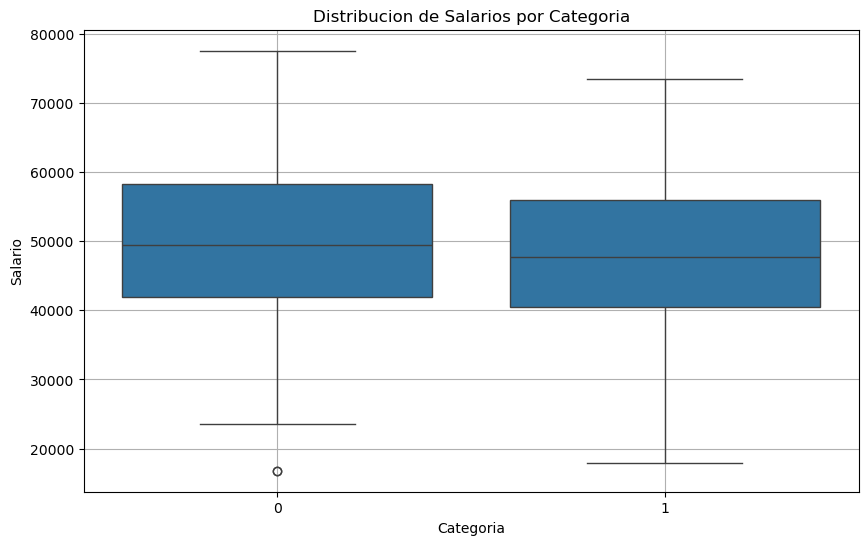

In [18]:
# Grafico de distribucion de salarios por categoria
plt.figure(figsize=(10,6))
sns.boxplot(x='categoria', y='salario', data=clientes_balanceados)
plt.title('Distribucion de Salarios por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

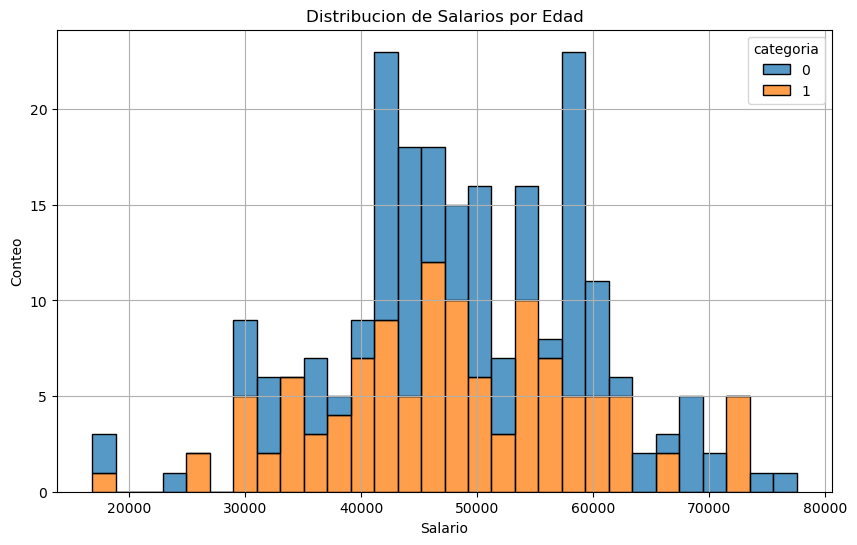

In [22]:
# Grafico de distribucion de salarios por edad con sns
plt.figure(figsize=(10, 6))
sns.histplot(
    data=clientes_balanceados, x="salario", hue="categoria", multiple="stack", bins=30
)
plt.title("Distribucion de Salarios por Edad")
plt.xlabel("Salario")
plt.ylabel("Conteo")
plt.grid(True)
plt.show()